### Project Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1. Load Extended Dataset

In [ ]:
df = pd.read_csv("auto_mpg_extended.csv")
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

print("\nColumn Names:", df.columns)
print("\nSummary Statistics:")
display(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Loaded Successfully!
Shape: (1098, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1



Column Names: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

Summary Statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,23.625879,5.414390,191.528580,103.401083,2963.516494,15.704782,76.042805,1.603825
std,7.878309,1.696275,105.159282,38.723215,858.972461,2.836990,3.716355,0.816123
min,7.675166,3.000000,63.059549,40.000000,1556.221732,7.541677,70.000000,1.000000
25%,17.269368,4.000000,101.808032,75.000000,2219.912882,13.927117,73.000000,1.000000
50%,23.000000,4.000000,141.985652,91.911238,2747.751829,15.500000,76.000000,1.000000
75%,29.279750,8.000000,260.000000,120.639180,3604.899239,17.404921,79.000000,2.000000
max,46.600000,8.000000,467.504070,230.000000,5140.000000,25.387340,82.000000,3.000000



Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


### 2. Encoding Categorical Features

In [3]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin', dtype=int)
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### 3. Exploratory Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

#### Histograms of Numerical Features

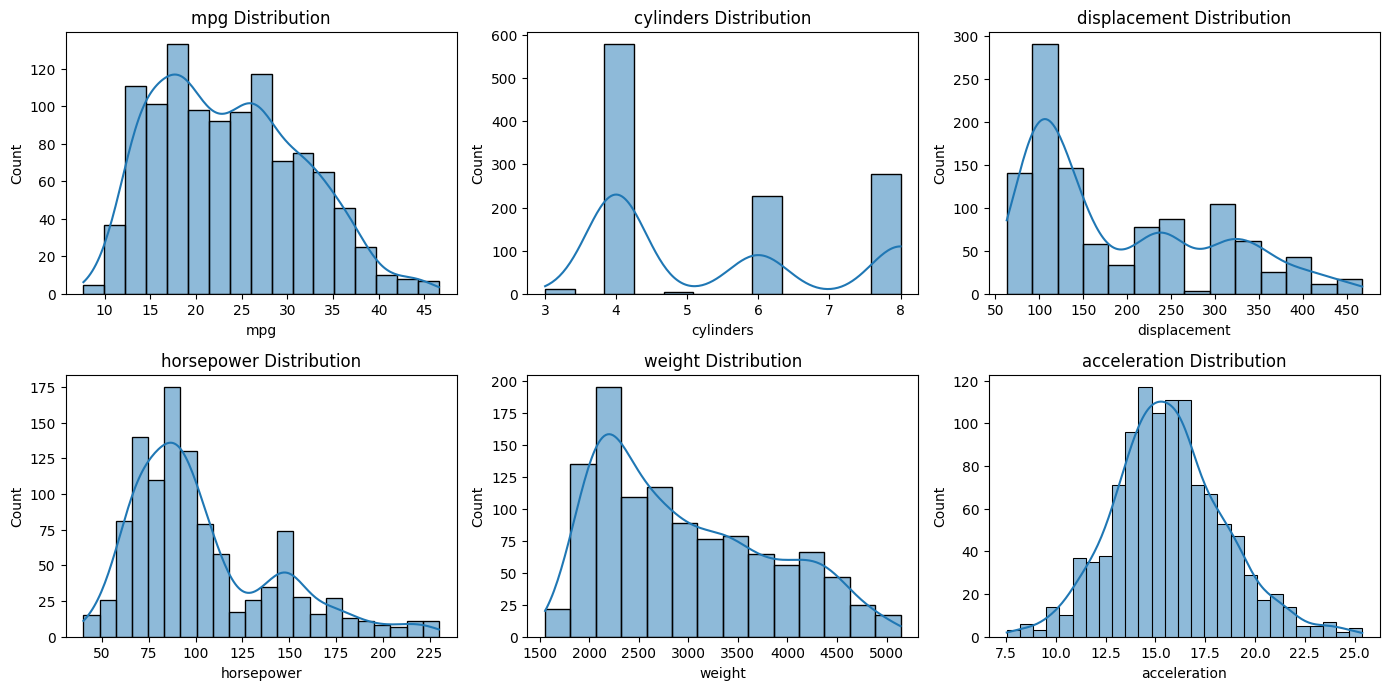

In [5]:
plt.figure(figsize=(14,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

#### Boxplots of Numerical Features

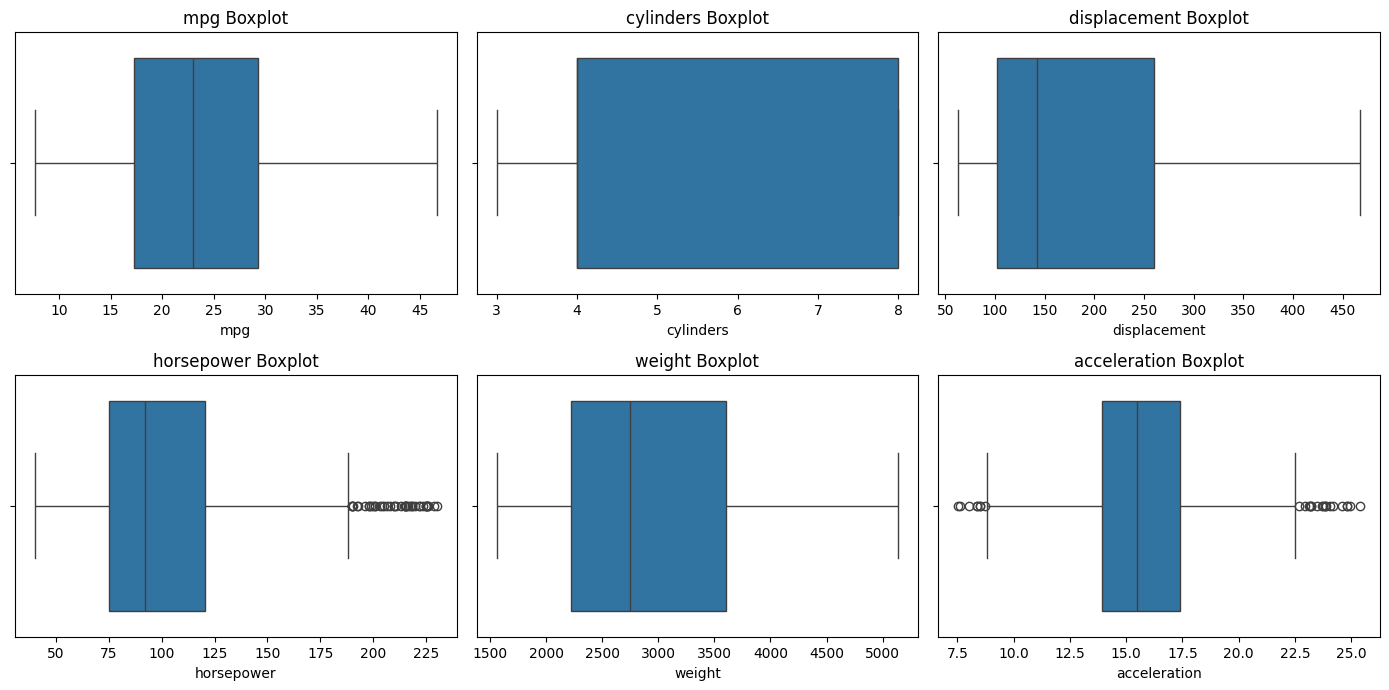

In [6]:
plt.figure(figsize=(14,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

#### Correlation Heatmap

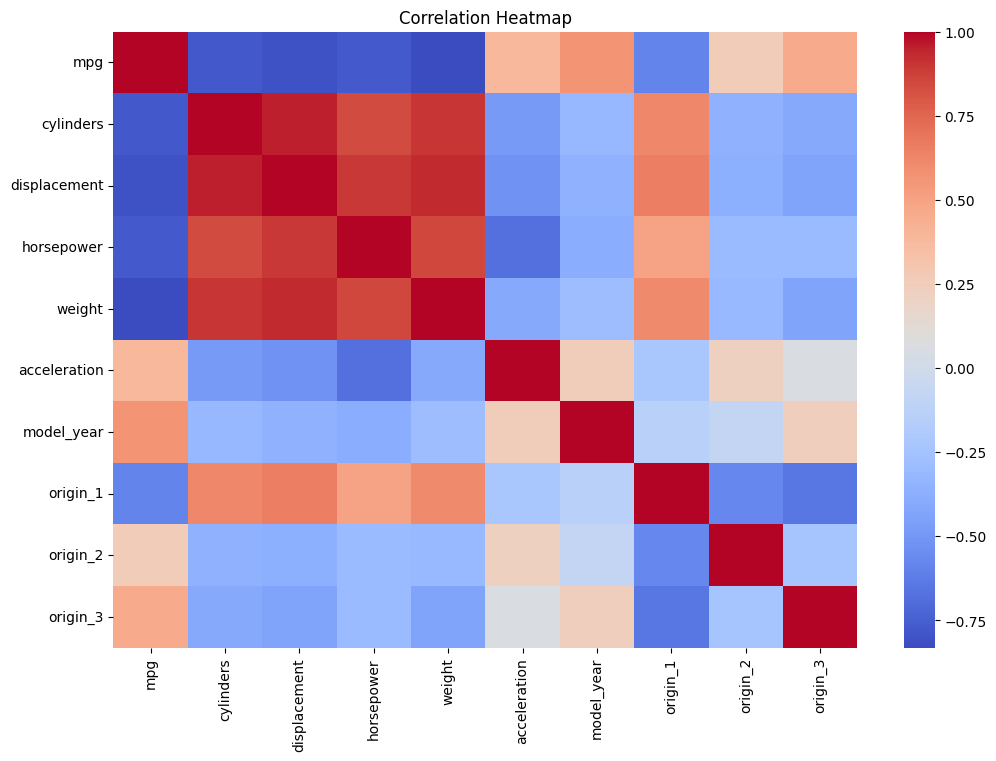

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 4. Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['cylinders','displacement','horsepower','weight','acceleration','model_year']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,1.524982,1.098562,0.687211,0.629508,-1.306480,-1.626744,1,0,0
1,15.0,1.524982,1.507652,1.591474,0.849638,-1.482803,-1.626744,1,0,0
2,18.0,1.524982,1.203213,1.203933,0.550307,-1.659126,-1.626744,1,0,0
3,16.0,1.524982,1.070021,1.203933,0.546813,-1.306480,-1.626744,1,0,0
4,17.0,1.524982,1.050994,0.945572,0.565449,-1.835450,-1.626744,1,0,0


### 5. Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['mpg'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train Shape:", X_train.shape, " | Test Shape:", X_test.shape)

Train Shape: (878, 9)  | Test Shape: (220, 9)


### 6. Model Training and Evaluation

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=6, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVM)": SVR(kernel='rbf', C=10, gamma='auto')
}

In [12]:
results = []

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    cv = cross_val_score(model,X,y,cv=5,scoring='r2').mean()

    results.append([name,r2,adj,mae,rmse,cv])

    print(f"\n{name}")
    print("MAE:",round(mae,3)," RMSE:",round(rmse,3)," R²:",round(r2,3)," Adjusted R²:",round(adj,3)," CV R²:",round(cv,3))

In [13]:
for name, model in models.items():
    evaluate_model(name, model)

results_df = pd.DataFrame(results, columns=["Model","R²","Adjusted R²","MAE","RMSE","CV R²"])
display(results_df)


Linear Regression
MAE: 2.703  RMSE: 3.506  R²: 0.808  Adjusted R²: 0.799  CV R²: 0.798

Ridge Regression
MAE: 2.701  RMSE: 3.505  R²: 0.808  Adjusted R²: 0.799  CV R²: 0.798

Lasso Regression
MAE: 2.706  RMSE: 3.502  R²: 0.808  Adjusted R²: 0.8  CV R²: 0.799

Decision Tree Regressor
MAE: 2.053  RMSE: 2.877  R²: 0.87  Adjusted R²: 0.865  CV R²: 0.878

Random Forest Regressor
MAE: 1.516  RMSE: 2.074  R²: 0.933  Adjusted R²: 0.93  CV R²: 0.932

Gradient Boosting Regressor
MAE: 1.823  RMSE: 2.381  R²: 0.911  Adjusted R²: 0.907  CV R²: 0.913

Support Vector Regressor (SVM)
MAE: 1.927  RMSE: 2.621  R²: 0.892  Adjusted R²: 0.888  CV R²: 0.897


,Model,R²,Adjusted R²,MAE,RMSE,CV R²
0,Linear Regression,0.807571,0.799324,2.703482,3.505618,0.797997
1,Ridge Regression,0.807646,0.799403,2.701494,3.504930,0.798141
2,Lasso Regression,0.808006,0.799778,2.706015,3.501648,0.798622
3,Decision Tree Regressor,0.870417,0.864863,2.052872,2.876761,0.878483
4,Random Forest Regressor,0.932673,0.929788,1.516096,2.073586,0.931635
5,Gradient Boosting Regressor,0.911249,0.907445,1.823172,2.380766,0.912594
6,Support Vector Regressor (SVM),0.892417,0.887807,1.926655,2.621201,0.896533


### 7. Visualization of Model Results

In [14]:
model_predictions = {name:model.fit(X_train,y_train).predict(X_test) for name,model in models.items()}

#### Actual vs. Predicted Plots

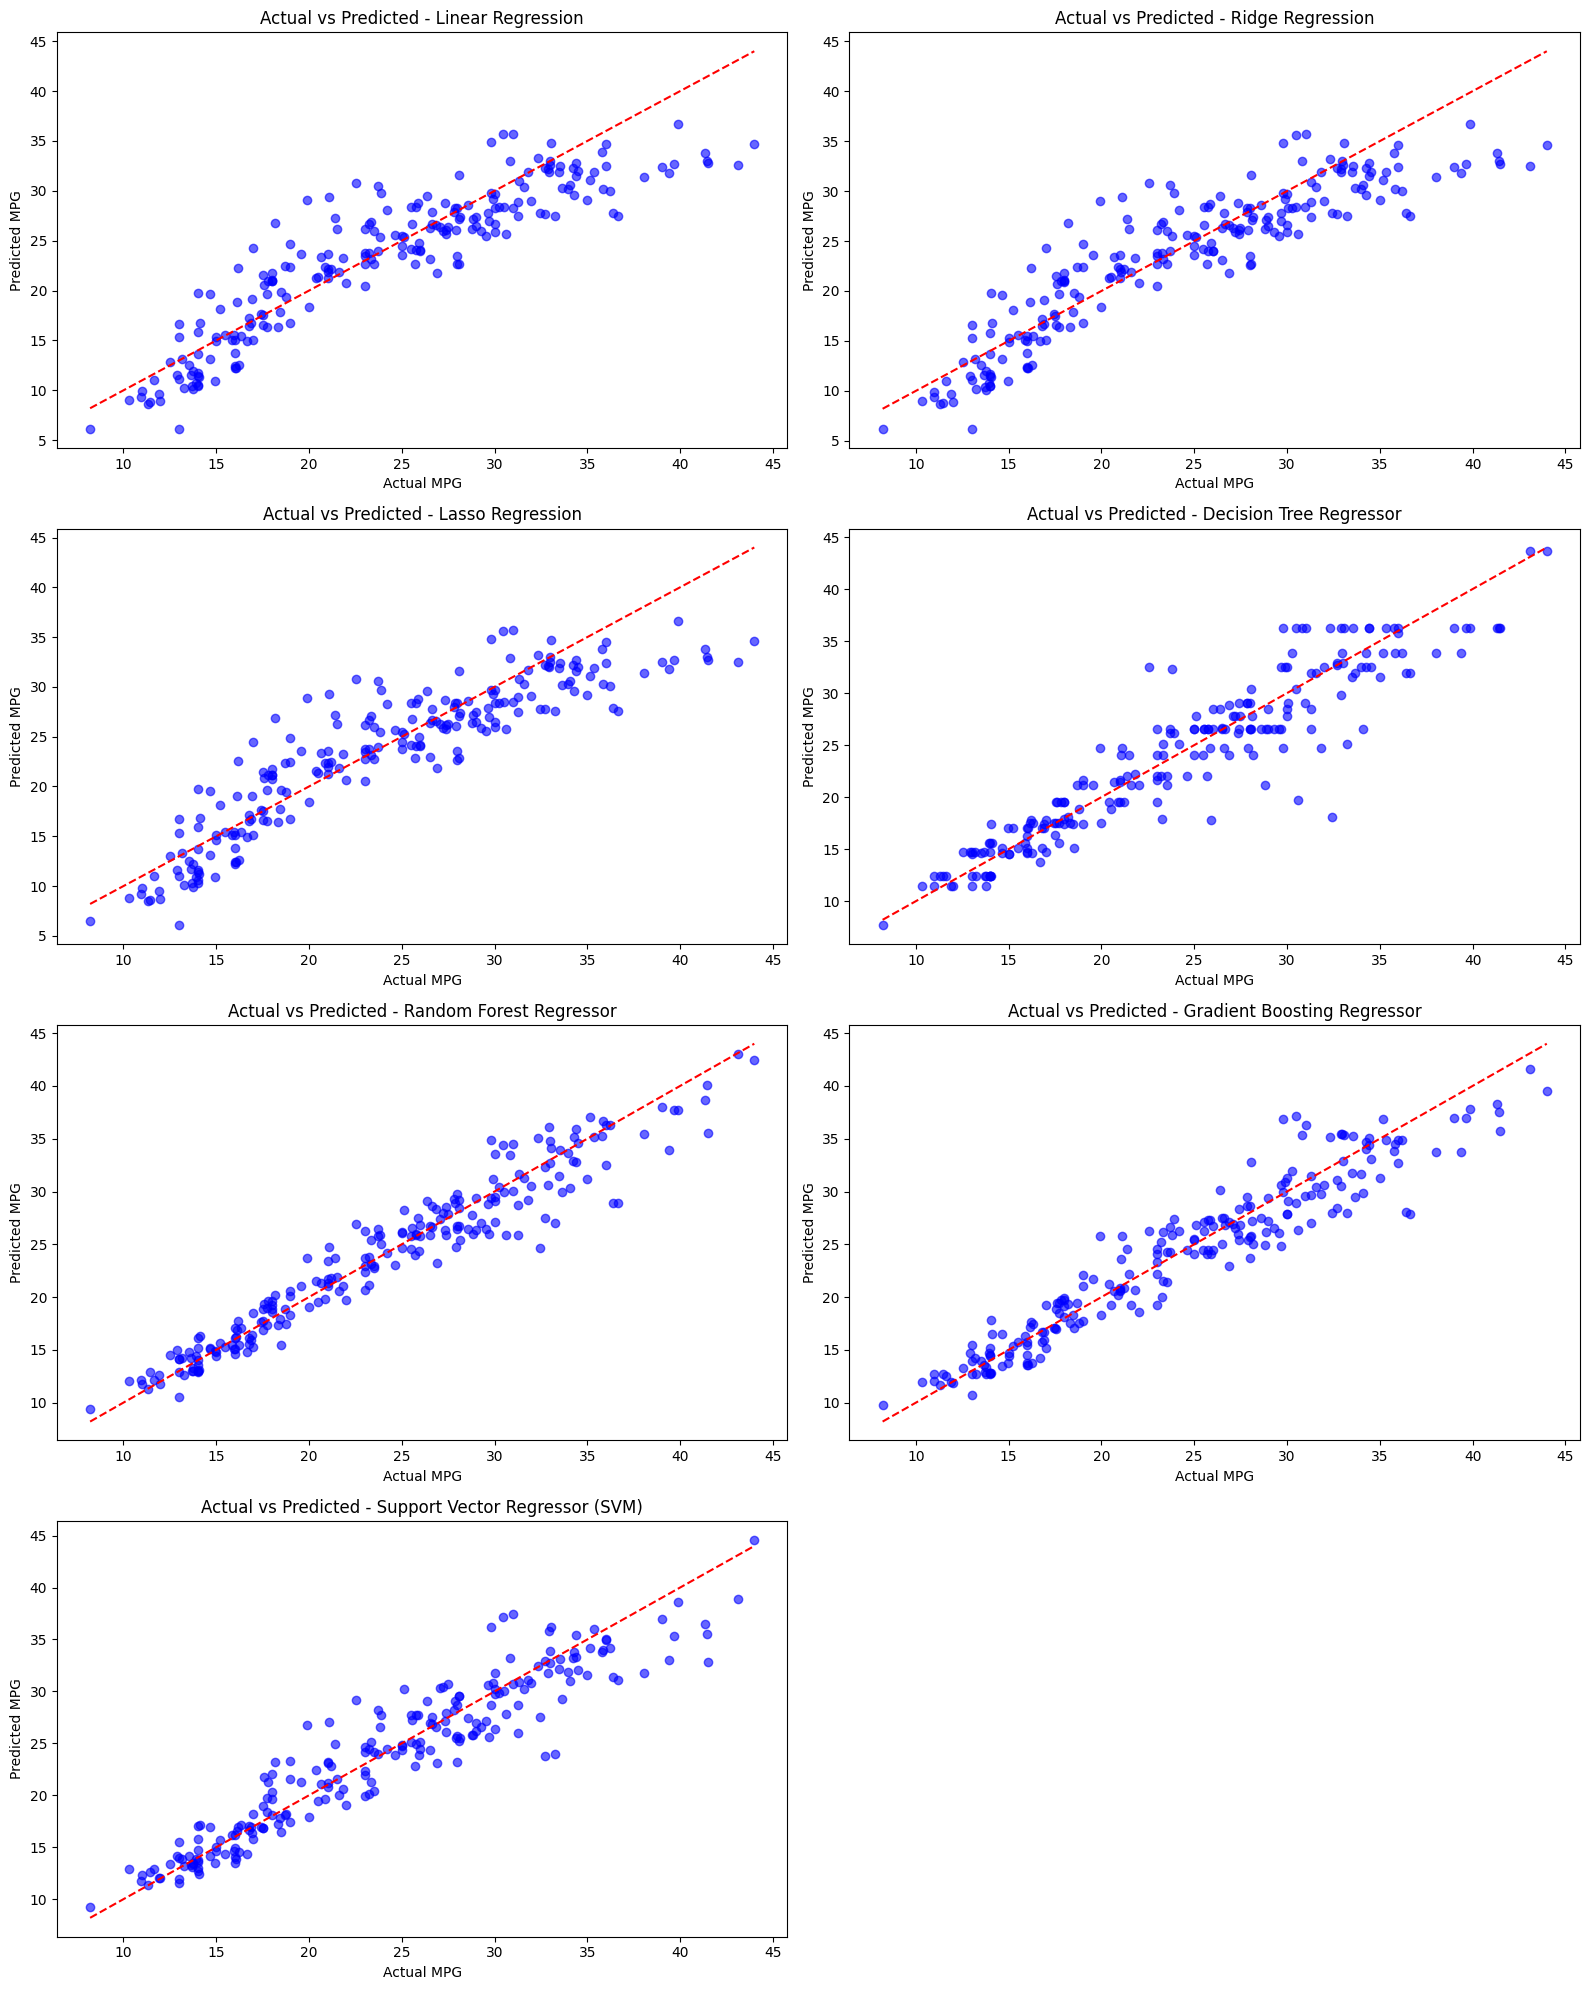

In [15]:
# Actual vs Predicted
plt.figure(figsize=(16,20))
i=1
for name,y_pred in model_predictions.items():
    plt.subplot(4,2,i)
    plt.scatter(y_test,y_pred,alpha=0.6,color='blue')
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel("Actual MPG")
    plt.ylabel("Predicted MPG")
    i+=1
plt.tight_layout()
plt.show()

#### Residual Plots

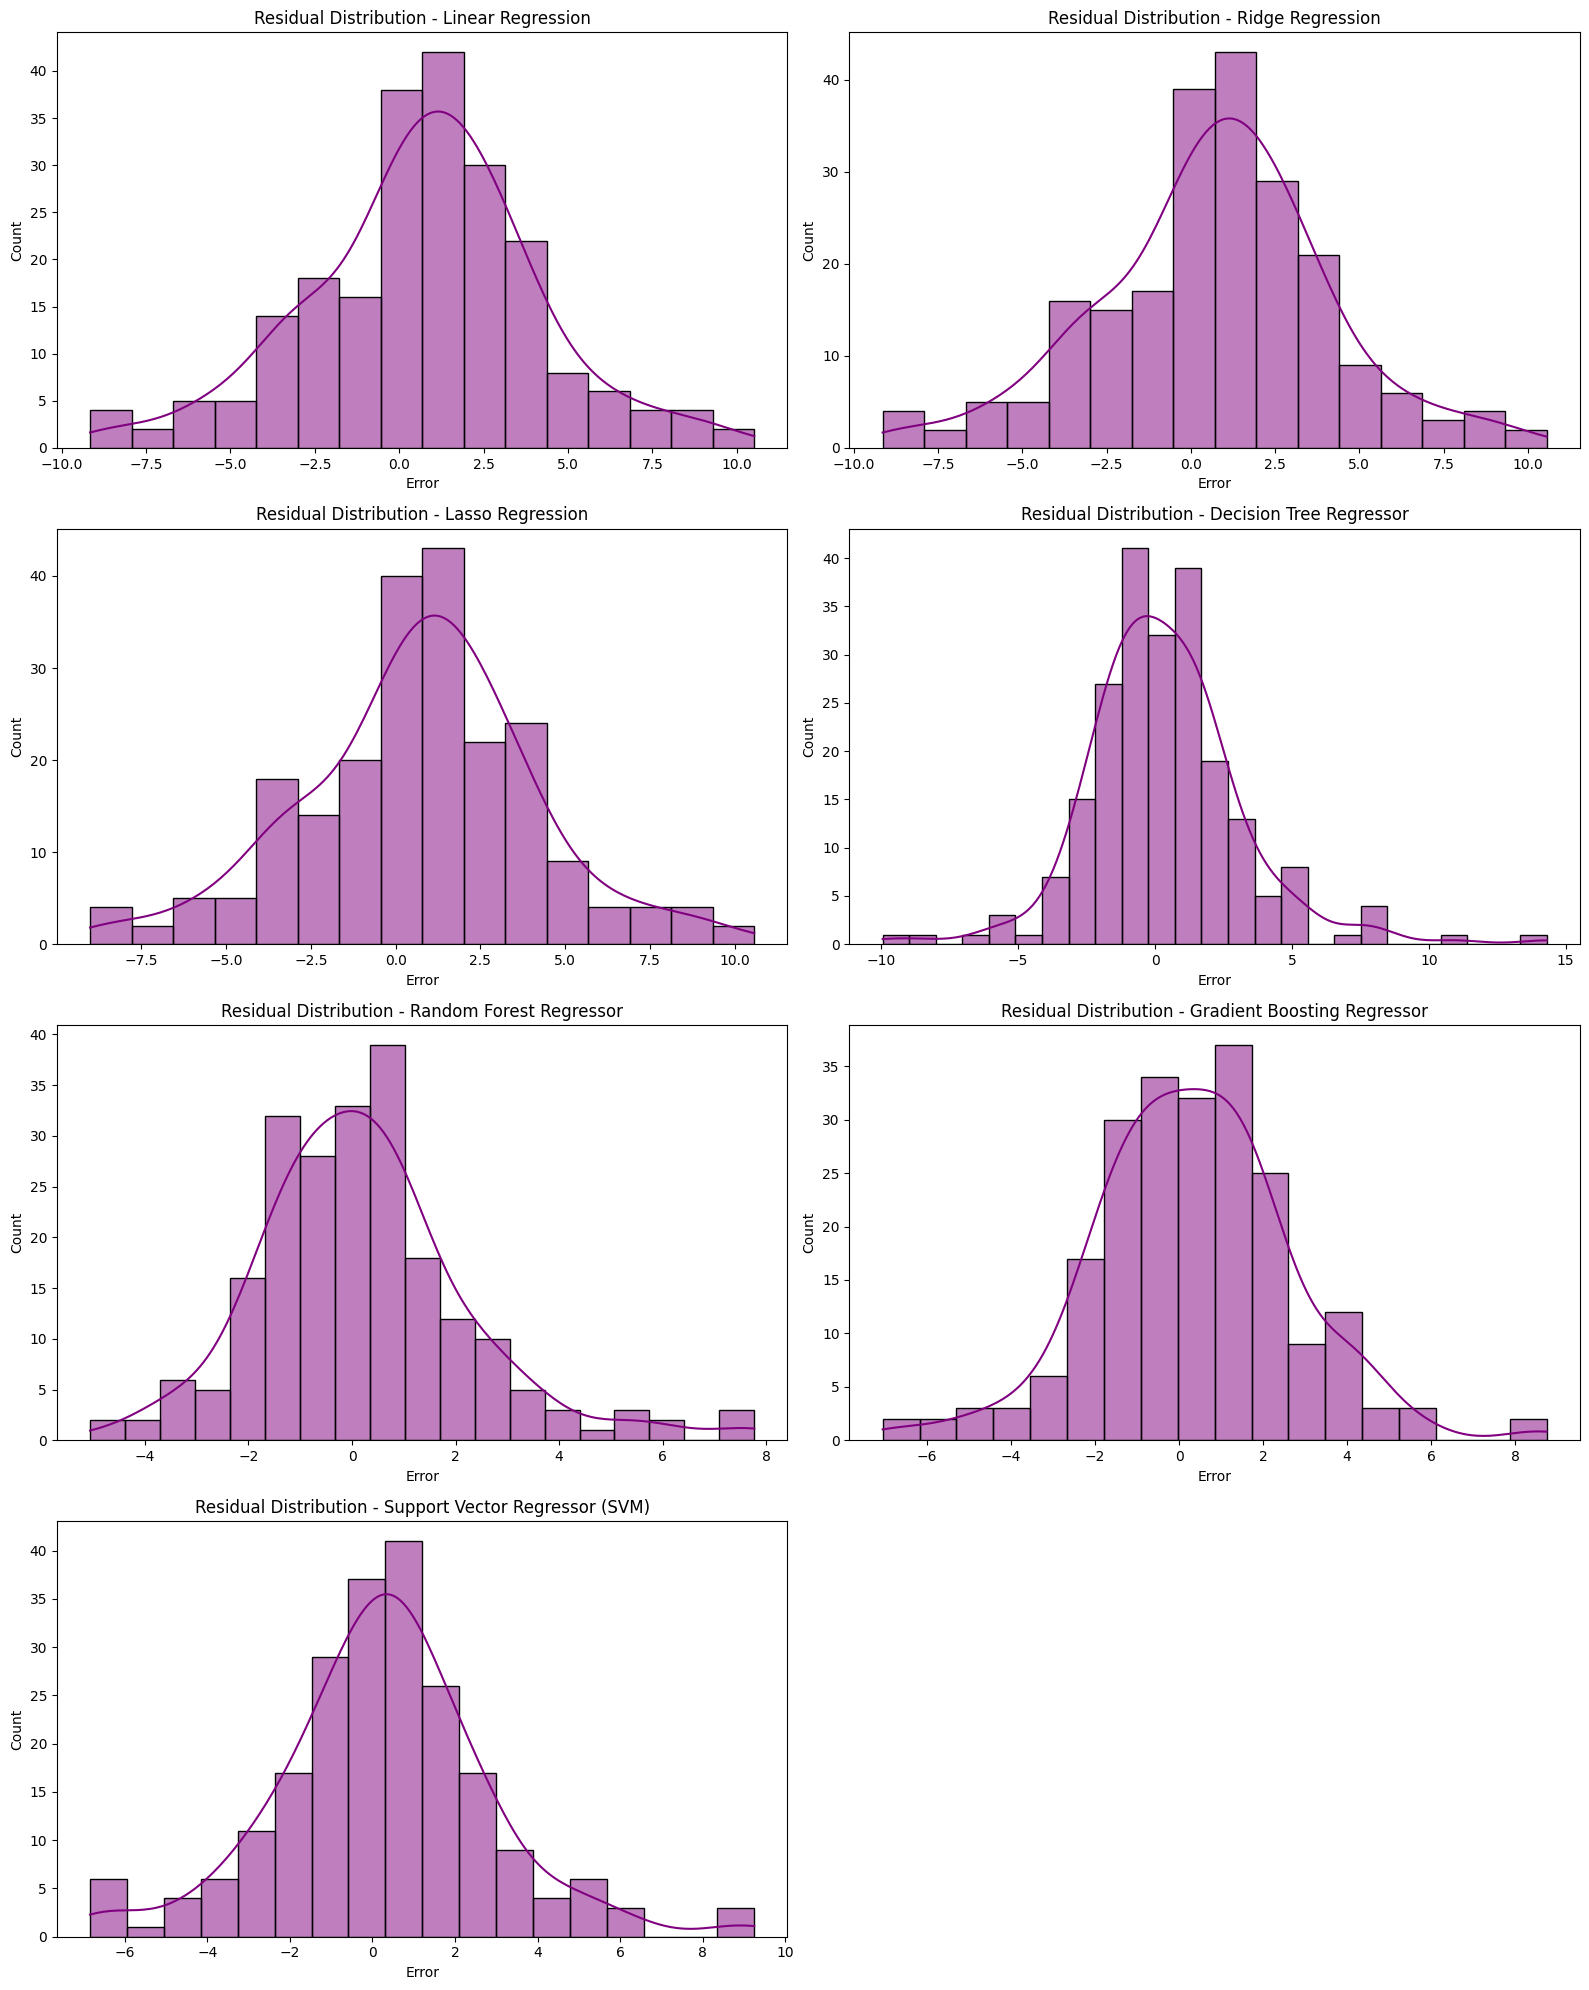

In [16]:
# Residual Plots
plt.figure(figsize=(16,20))
i=1
for name,y_pred in model_predictions.items():
    residuals = y_test - y_pred
    plt.subplot(4,2,i)
    sns.histplot(residuals,kde=True,color='purple')
    plt.title(f'Residual Distribution - {name}')
    plt.xlabel("Error")
    i+=1
plt.tight_layout()
plt.show()

#### Feature Importance for Tree-based Models

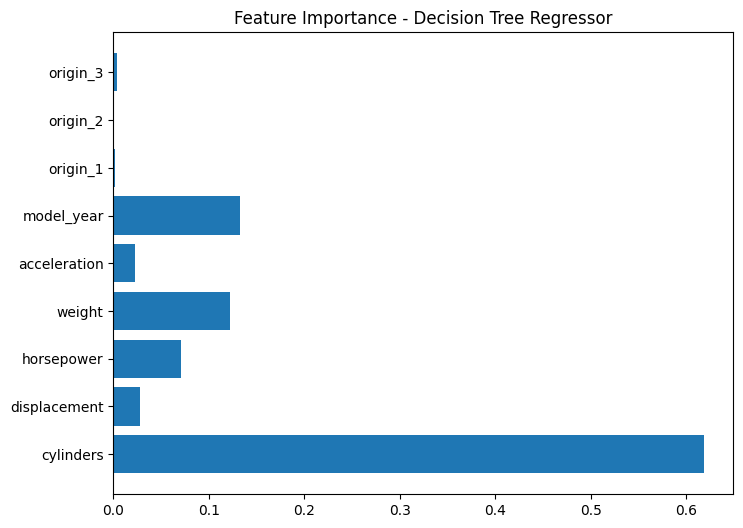

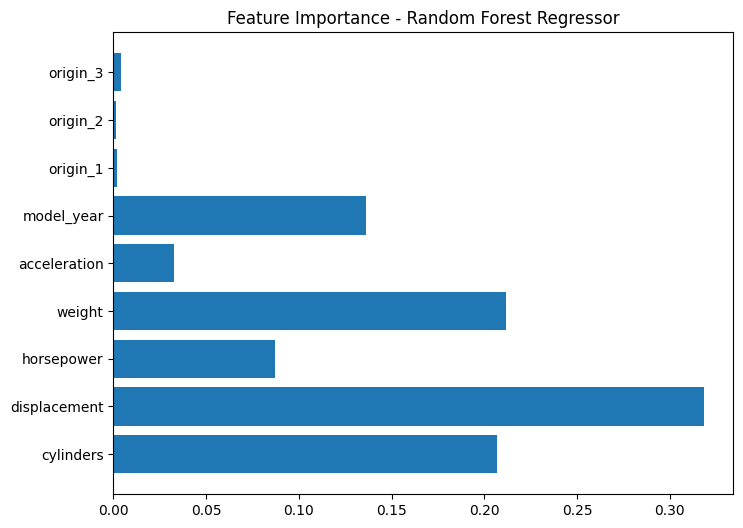

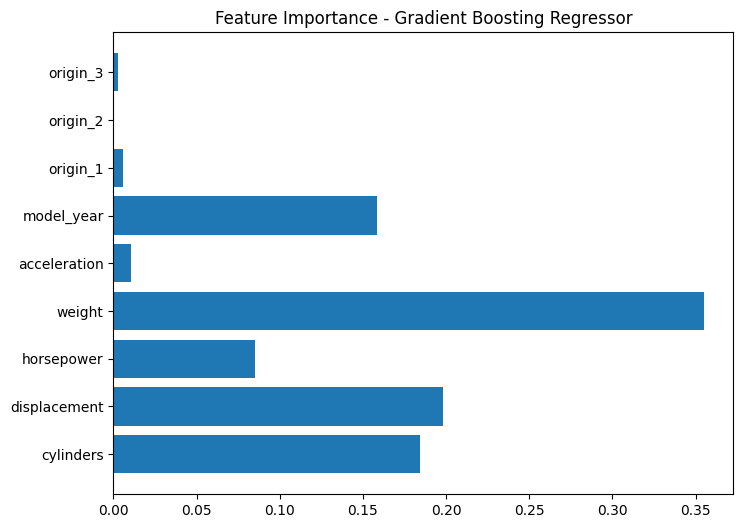

In [17]:
# Feature importance (tree models only)
tree_models = ["Decision Tree Regressor","Random Forest Regressor","Gradient Boosting Regressor"]
for name in tree_models:
    model = models[name].fit(X_train,y_train)
    importances = model.feature_importances_
    plt.figure(figsize=(8,6))
    plt.barh(X.columns, importances)
    plt.title(f"Feature Importance - {name}")
    plt.show()

### 8. Final Model Selection And Training

In [18]:
print("\nFinal Model Selected: Random Forest Regressor\n")

final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Predictions
final_predictions = final_model.predict(X_test)

# Final Evaluation
final_mae = mean_absolute_error(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)

print("Performance of Final Model (Random Forest):")
print("------------------------------------------")
print(f"Mean Absolute Error (MAE): {final_mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.3f}")
print(f"R² Score: {final_r2:.3f}")

# Save model (Optional)
import joblib
joblib.dump(final_model, "final_mpg_model_random_forest.pkl")
print("\nFinal model saved as: final_mpg_model_random_forest.pkl")



Final Model Selected: Random Forest Regressor

Performance of Final Model (Random Forest):
------------------------------------------
Mean Absolute Error (MAE): 1.516
Root Mean Squared Error (RMSE): 2.074
R² Score: 0.933

Final model saved as: final_mpg_model_random_forest.pkl
